In [1]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import geopandas as gpd
import matplotlib.dates as md
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

In [2]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    data.columns = [i.strip() for i in data.columns]
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, np.NaN)

In [3]:
DAY22 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220602_R0_L1_20230918T232331.ict')
start_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 12:58:55"))
stop_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 13:10:00"))

DAY22_subset = DAY22[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY22_subset = DAY22_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
# Drop rows with NaN values
DAY22_subset = DAY22_subset.dropna()
DAY22_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
6497,2022-06-02 13:07:31,2022-06-02 13:07:32,32.886285,-69.398170,3778.82,2.190,0.850
6498,2022-06-02 13:07:32,2022-06-02 13:07:33,32.885385,-69.397090,3777.74,1.975,0.975
6499,2022-06-02 13:07:33,2022-06-02 13:07:34,32.884488,-69.396004,3776.73,1.785,1.100


In [4]:
DAY2 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220602_R0_L1_20230918T232331.ict')
start_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 14:11:00"))
DAY2_subset = DAY2[start_index[0][0]:stop_index[0][0]]
DAY2_subset = DAY2_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY2_subset = DAY2_subset.dropna()
DAY2_subset



,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [5]:
DAY2b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220602_R0_L2_20230918T232331.ict')
start_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
DAY2b_subset = DAY2b[start_index[0][0]:stop_index[0][0]]
DAY2b_subset = DAY2b_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY2b_subset = DAY2b_subset.dropna()
DAY2b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [6]:
DAY7 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220607_R0_L1_20230918T232332.ict')
start_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
    
DAY7_subset =DAY7[start_index[0][0]:stop_index[0][0]]
DAY7_subset = DAY7_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY7_subset = DAY7_subset.dropna()
DAY7_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
11002,2022-06-07 14:42:05,2022-06-07 14:42:06,32.240977,-65.046832,1709.35,2.005,0.650
11003,2022-06-07 14:42:06,2022-06-07 14:42:07,32.241582,-65.045867,1711.97,2.020,0.715
11004,2022-06-07 14:42:07,2022-06-07 14:42:08,32.242165,-65.044882,1714.65,2.280,0.780
11012,2022-06-07 14:42:15,2022-06-07 14:42:16,32.246183,-65.036494,1734.40,2.240,0.950
11013,2022-06-07 14:42:16,2022-06-07 14:42:17,32.246606,-65.035393,1736.57,1.950,0.905
11014,2022-06-07 14:42:17,2022-06-07 14:42:18,32.247011,-65.034280,1738.74,1.695,0.745
11015,2022-06-07 14:42:18,2022-06-07 14:42:19,32.247397,-65.033157,1740.89,1.475,0.640
11016,2022-06-07 14:42:19,2022-06-07 14:42:20,32.247765,-65.032024,1743.03,1.330,0.650


In [7]:
DAY7b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220607_R0_L2_20230918T232332.ict')
start_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
    
DAY7b_subset =DAY7b[start_index[0][0]:stop_index[0][0]]
DAY7b_subset = DAY7b_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY7b_subset = DAY7b_subset.dropna()
DAY7b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [8]:
DAY8 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220608_R0_L2_20230918T232333.ict')
start_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
DAY8_subset = DAY8[start_index[0][0]:stop_index[0][0]]
DAY8_subset = DAY8_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY8_subset = DAY8_subset.dropna()
DAY8_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [9]:
DAY10 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220610_R0_L1_20230918T232333.ict')
start_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
DAY10_subset = DAY10[start_index[0][0]:stop_index[0][0]]
DAY10_subset = DAY10_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY10_subset = DAY10_subset.dropna()
DAY10_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [10]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220610_R0_L2_20230918T232333.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:51:00"))
    
DAY110b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]
DAY110b_subset = DAY110b_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY110b_subset = DAY110b_subset.dropna()
DAY110b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
8126,2022-06-10 19:45:44,2022-06-10 19:45:45,31.637785,-65.846138,4501.85,0.910,0.985
8127,2022-06-10 19:45:45,2022-06-10 19:45:46,31.636715,-65.846486,4512.82,0.825,1.020
8128,2022-06-10 19:45:46,2022-06-10 19:45:47,31.635646,-65.846836,4523.86,0.755,1.125
8129,2022-06-10 19:45:47,2022-06-10 19:45:48,31.634578,-65.847190,4534.95,0.625,1.275
8130,2022-06-10 19:45:48,2022-06-10 19:45:49,31.633512,-65.847546,4546.10,0.475,1.365
...,...,...,...,...,...,...,...
8437,2022-06-10 19:50:55,2022-06-10 19:50:56,31.228702,-65.973911,4967.45,0.515,1.120
8438,2022-06-10 19:50:56,2022-06-10 19:50:57,31.227365,-65.974288,4964.11,0.705,1.070
8439,2022-06-10 19:50:57,2022-06-10 19:50:58,31.226025,-65.974659,4960.81,0.885,1.155
8440,2022-06-10 19:50:58,2022-06-10 19:50:59,31.224682,-65.975025,4957.52,1.085,1.230


In [11]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220610_R0_L2_20230918T232333.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:25:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:35:00"))
    
DAY10b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]
DAY10b_subset = DAY10b_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY10b_subset = DAY10b_subset.dropna()
DAY10b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [12]:
DAY11 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220611_R0_L1_20230918T232334.ict')
start_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
DAY11_subset = DAY11[start_index[0][0]:stop_index[0][0]]
DAY11_subset = DAY11_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY11_subset = DAY11_subset.dropna()
DAY11_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [13]:
DAY11b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220611_R0_L2_20230918T232334.ict')
start_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:08:00"))
stop_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:15:39"))
    
DAY11b_subset = DAY11b[start_index[0][0]:stop_index[0][0]]
DAY11b_subset = DAY11b_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY11b_subset = DAY11b_subset.dropna()
DAY11b_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [14]:
DAY13 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220613_R0_L1_20230918T232335.ict')
start_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
DAY13_subset = DAY13[start_index[0][0]:stop_index[0][0]]
DAY13_subset = DAY13_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY13_subset = DAY13_subset.dropna()
DAY13_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10901,2022-06-13 14:44:46,2022-06-13 14:44:47,32.261553,-65.063989,3828.94,0.550,1.060
10902,2022-06-13 14:44:47,2022-06-13 14:44:48,32.260624,-65.064730,3839.11,0.550,1.000
10904,2022-06-13 14:44:49,2022-06-13 14:44:50,32.258739,-65.066163,3859.09,1.310,0.910
10905,2022-06-13 14:44:50,2022-06-13 14:44:51,32.257782,-65.066853,3868.95,1.110,1.000
10906,2022-06-13 14:44:51,2022-06-13 14:44:52,32.256816,-65.067526,3878.74,0.730,1.085
10907,2022-06-13 14:44:52,2022-06-13 14:44:53,32.255840,-65.068183,3888.49,0.450,1.040
10908,2022-06-13 14:44:53,2022-06-13 14:44:54,32.254857,-65.068822,3898.20,0.245,0.930
10909,2022-06-13 14:44:54,2022-06-13 14:44:55,32.253866,-65.069445,3907.86,0.080,0.795
10910,2022-06-13 14:44:55,2022-06-13 14:44:56,32.252865,-65.070049,3917.45,-0.050,0.710
10911,2022-06-13 14:44:56,2022-06-13 14:44:57,32.251857,-65.070636,3926.98,-0.055,0.730


In [15]:
DAY13b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220613_R0_L2_20230918T232335.ict')
start_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00")) 
DAY13b_subset = DAY13b[start_index[0][0]:stop_index[0][0]]
DAY13b_subset = DAY13b_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY13b_subset = DAY13b_subset.dropna()
DAY13b_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
11820,2022-06-13 20:06:10,2022-06-13 20:06:11,32.232292,-64.995428,3227.65,1.075,1.390
11821,2022-06-13 20:06:11,2022-06-13 20:06:12,32.231460,-64.994421,3235.24,1.330,1.390
11824,2022-06-13 20:06:14,2022-06-13 20:06:15,32.229140,-64.991205,3261.76,1.710,1.690
11825,2022-06-13 20:06:15,2022-06-13 20:06:16,32.228424,-64.990077,3271.46,1.860,1.660
11826,2022-06-13 20:06:16,2022-06-13 20:06:17,32.227737,-64.988923,3281.48,2.110,1.715
...,...,...,...,...,...,...,...
11972,2022-06-13 20:08:42,2022-06-13 20:08:43,32.300477,-64.983970,4455.08,0.120,1.350
11973,2022-06-13 20:08:43,2022-06-13 20:08:44,32.299865,-64.985119,4462.41,0.115,1.405
11974,2022-06-13 20:08:44,2022-06-13 20:08:45,32.299221,-64.986243,4470.36,0.315,1.410
11975,2022-06-13 20:08:45,2022-06-13 20:08:46,32.298545,-64.987340,4478.69,0.600,1.335


In [16]:
DAY14 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220614_R0_20230918T232335.ict')
start_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
DAY14_subset = DAY14[start_index[0][0]:stop_index[0][0]]
DAY14_subset = DAY14_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY14_subset = DAY14_subset.dropna()
DAY14_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
9843,2022-06-14 16:13:00,2022-06-14 16:13:01,30.644900,-64.372136,3847.91,-1.040,0.935
9844,2022-06-14 16:13:01,2022-06-14 16:13:02,30.644294,-64.373248,3855.40,-0.900,1.060
9865,2022-06-14 16:13:22,2022-06-14 16:13:23,30.640215,-64.399909,4020.90,-0.005,0.270
9866,2022-06-14 16:13:23,2022-06-14 16:13:24,30.640466,-64.401196,4028.70,0.060,0.270
9874,2022-06-14 16:13:31,2022-06-14 16:13:32,30.644011,-64.410894,4089.30,0.025,0.950
...,...,...,...,...,...,...,...
10558,2022-06-14 16:24:55,2022-06-14 16:24:56,30.850057,-64.439182,8454.59,-0.390,0.995
10559,2022-06-14 16:24:56,2022-06-14 16:24:57,30.851471,-64.439393,8461.00,-0.485,1.365
10560,2022-06-14 16:24:57,2022-06-14 16:24:58,30.852885,-64.439595,8467.42,-0.605,1.735
10561,2022-06-14 16:24:58,2022-06-14 16:24:59,30.854300,-64.439786,8473.86,-0.705,1.850


In [17]:
DAY17 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220617_R0_20230918T232335.ict')
start_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00")) 
DAY17_subset = DAY17[start_index[0][0]:stop_index[0][0]]
DAY17_subset = DAY17_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY17_subset = DAY17_subset.dropna()
DAY17_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
11518,2022-06-17 16:37:29,2022-06-17 16:37:30,32.178931,-65.016075,3111.76,-0.070,1.030
11519,2022-06-17 16:37:30,2022-06-17 16:37:31,32.178736,-65.014702,3118.89,-0.120,1.025
11520,2022-06-17 16:37:31,2022-06-17 16:37:32,32.178582,-65.013323,3126.06,-0.110,1.030
11521,2022-06-17 16:37:32,2022-06-17 16:37:33,32.178467,-65.011939,3133.24,-0.080,1.110
11522,2022-06-17 16:37:33,2022-06-17 16:37:34,32.178393,-65.010554,3140.39,-0.035,1.180
...,...,...,...,...,...,...,...
11972,2022-06-17 16:45:03,2022-06-17 16:45:04,32.194806,-64.934055,6909.97,2.860,1.310
11973,2022-06-17 16:45:04,2022-06-17 16:45:05,32.196020,-64.934266,6916.77,3.055,1.330
11974,2022-06-17 16:45:05,2022-06-17 16:45:06,32.197226,-64.934522,6923.57,3.300,1.355
11975,2022-06-17 16:45:06,2022-06-17 16:45:07,32.198422,-64.934825,6930.39,3.745,1.350


In [18]:

'''# Concatenate the dataframes vertically (along rows)
Africa_total = pd.concat([DAY13_subset, DAY13b_subset,], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Africa_total.reset_index(drop=True, inplace=True)
Africa_total.describe()'''

'# Concatenate the dataframes vertically (along rows)\nAfrica_total = pd.concat([DAY13_subset, DAY13b_subset,], axis=0)\n\n# Reset the index of the DAY2b_subsetd dataframe\nAfrica_total.reset_index(drop=True, inplace=True)\nAfrica_total.describe()'

In [49]:
# Concatenate the dataframes vertically (along rows)
Ocean_total = pd.concat([DAY2_subset, DAY22_subset, DAY2b_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Ocean_total.reset_index(drop=True, inplace=True)
Ocean_total.mean()

Time_Start                              2022-06-02 13:07:32
Time_Stop                     2022-06-02 13:07:33.000000256
Latitude_THORNHILL                                32.885386
Longitude_THORNHILL                              -69.397088
GPS_Altitude_THORNHILL                          3777.763333
AEscat_450to700nm_ZIEMBA                           1.983333
AEabsDRY_470to660nm_ZIEMBA                            0.975
dtype: object

In [20]:
# Concatenate the dataframes vertically (along rows)
Caribbean_total = pd.concat([DAY10_subset, DAY10b_subset, DAY11_subset, DAY11b_subset, DAY13_subset, DAY13b_subset, DAY14_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Caribbean_total.reset_index(drop=True, inplace=True)
Caribbean_total.describe()

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
count,494,494,494.000000,494.000000,494.000000,494.000000,494.000000
mean,2022-06-14 09:24:40.641700352,2022-06-14 09:24:41.641700352,31.190214,-64.582333,6187.729231,-0.089160,1.333917
min,2022-06-13 14:44:46,2022-06-13 14:44:47,30.639381,-65.077534,3227.650000,-2.065000,0.270000
25%,2022-06-13 20:07:46.249999872,2022-06-13 20:07:47.249999872,30.666396,-64.919591,4154.555000,-0.555000,1.165000
50%,2022-06-14 16:20:15.500000,2022-06-14 16:20:16.500000,30.728625,-64.426945,6738.955000,-0.117500,1.350000
75%,2022-06-14 16:22:55.750000128,2022-06-14 16:22:56.750000128,32.224580,-64.389429,7803.500000,0.480000,1.500000
max,2022-06-14 16:24:59,2022-06-14 16:25:00,32.305495,-64.330064,8480.330000,2.295000,2.155000
std,NaN,NaN,0.720827,0.279381,1774.175777,0.822353,0.276375


In [48]:
# Concatenate the dataframes vertically (along rows)
North_America_total = pd.concat([DAY7_subset, DAY7b_subset, DAY8_subset, DAY17_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
North_America_total.reset_index(drop=True, inplace=True)
North_America_total.mean()

Time_Start                    2022-06-17 09:44:09.543165440
Time_Stop                     2022-06-17 09:44:10.543165696
Latitude_THORNHILL                                32.196546
Longitude_THORNHILL                              -64.990279
GPS_Altitude_THORNHILL                           5304.01536
AEscat_450to700nm_ZIEMBA                           1.550054
AEabsDRY_470to660nm_ZIEMBA                         1.404586
dtype: object

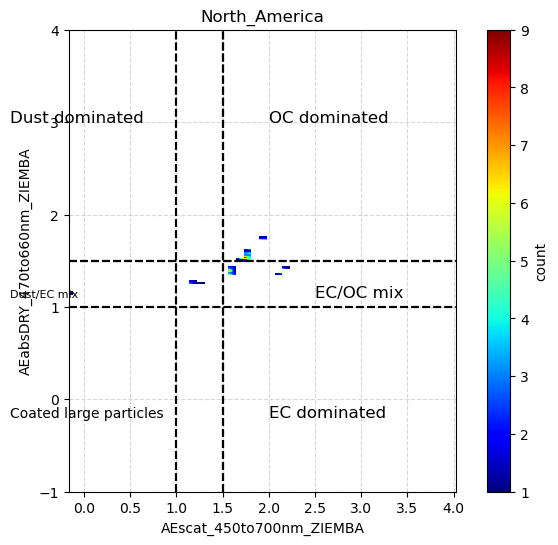

In [22]:

# Data
x = North_America_total['AEscat_450to700nm_ZIEMBA']
y = North_America_total['AEabsDRY_470to660nm_ZIEMBA']

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('North_America')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.axvline(1.5, color='k', linestyle='--')  # Separating line for EC
plt.axhline(1, color='k', linestyle='--')   # Separating line for Absorption - EC
plt.axvline(1.5, color='k', linestyle='--')    # Separating line for OC
plt.axhline(1.5, color='k', linestyle='--')   # Separating line for Absorption - OC
plt.axvline(1.5, color='k', linestyle='--')  # Separating line for EC/OC  mix
plt.axhline(1, color='k', linestyle='--')   # Separating line for Absorption - EC/OC
plt.axvline(1, color='k', linestyle='--') # Separating line for dust/EC  mix
plt.axhline(1.5, color='k', linestyle='--')   # Separating line for Absorption dust/EC  mix
plt.axvline(1, color='k', linestyle='--') # Separating line for dust  mix
plt.axhline(1.5, color='k', linestyle='--')   # Separating line for Absorption - Dust

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.show()


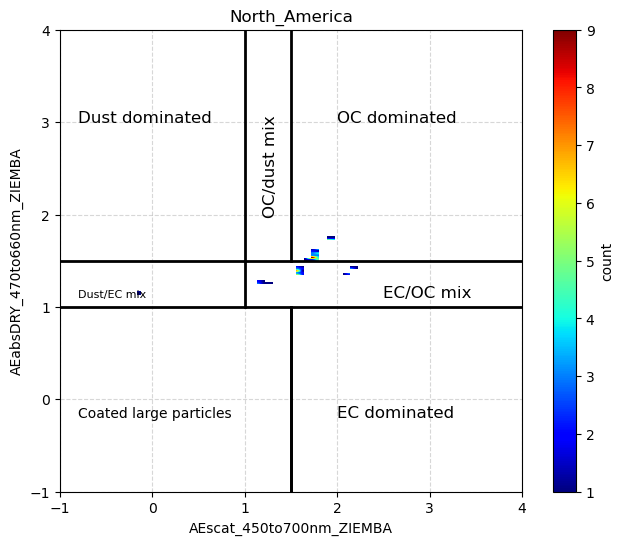

In [23]:
# Your data and histogram code...

# Data
x = North_America_total['AEscat_450to700nm_ZIEMBA']
y = North_America_total['AEabsDRY_470to660nm_ZIEMBA']
# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('North_America')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
plt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
plt.plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 

# Add category lines and labels
plt.plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
plt.plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated

# Add category lines and labels
plt.plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
plt.plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 



# Add other category lines...
# ...

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()


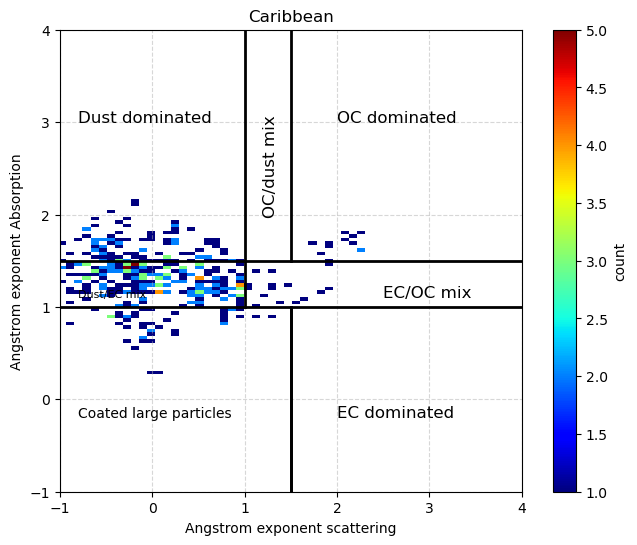

In [24]:
# Your data and histogram code...
# Your data and histogram code...

# Data
x = Caribbean_total['AEscat_450to700nm_ZIEMBA']
y = Caribbean_total['AEabsDRY_470to660nm_ZIEMBA']
# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('Angstrom exponent scattering')
plt.ylabel('Angstrom exponent Absorption')
plt.title('Caribbean')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
plt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
plt.plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 

# Add category lines and labels
plt.plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
plt.plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated

# Add category lines and labels
plt.plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
plt.plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 



# Add other category lines...
# ...

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()


In [25]:
# Your data and histogram code...
# Your data and histogram code...

'''# Data
x = Africa_total['AEscat_450to700nm_ZIEMBA']
y = Africa_total['AEabsDRY_470to660nm_ZIEMBA']
# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('Angstrom exponent scattering')
plt.ylabel('Angstrom exponent Absorption')
plt.title('North Africa')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
plt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
plt.plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 

# Add category lines and labels
plt.plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
plt.plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated

# Add category lines and labels
plt.plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
plt.plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 



# Add other category lines...
# ...

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()'''


"# Data\nx = Africa_total['AEscat_450to700nm_ZIEMBA']\ny = Africa_total['AEabsDRY_470to660nm_ZIEMBA']\n# Create a 2D histogram\nhist, xedges, yedges = np.histogram2d(x, y, bins=50)\nhist = np.where(hist == 0, np.nan, hist)\n\n# Plot the histogram\nplt.figure(figsize=(8, 6))\nplt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')\nplt.colorbar(label='count')\nplt.xlabel('Angstrom exponent scattering')\nplt.ylabel('Angstrom exponent Absorption')\nplt.title('North Africa')\nplt.grid(True, linestyle='--', alpha=0.5)\n\n# Add category lines and labels\nplt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle\nplt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle\n\n# Add category lines and labels\nplt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC\nplt.plot([1.5, 4], [1, 1], color='k', linestyle='-', l

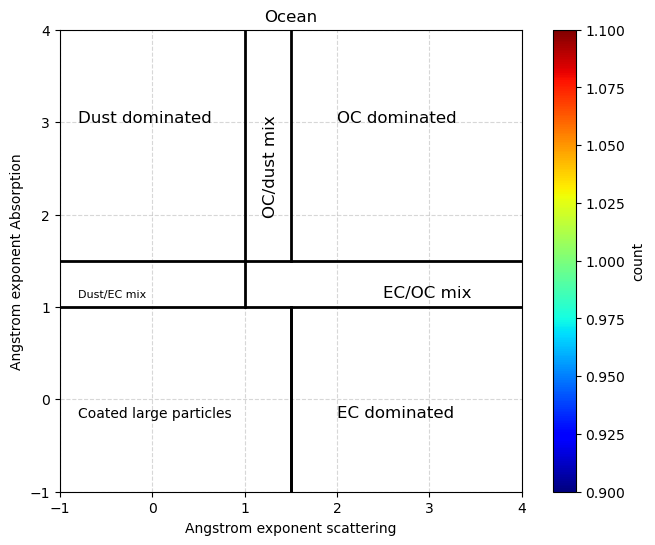

In [26]:


# Data
x = Ocean_total['AEscat_450to700nm_ZIEMBA']
y = Ocean_total['AEabsDRY_470to660nm_ZIEMBA']
# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('Angstrom exponent scattering')
plt.ylabel('Angstrom exponent Absorption')
plt.title('Ocean')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
plt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
plt.plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 

# Add category lines and labels
plt.plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
plt.plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated

# Add category lines and labels
plt.plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
plt.plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 



# Add other category lines...
# ...

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()


In [27]:

# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    }
}


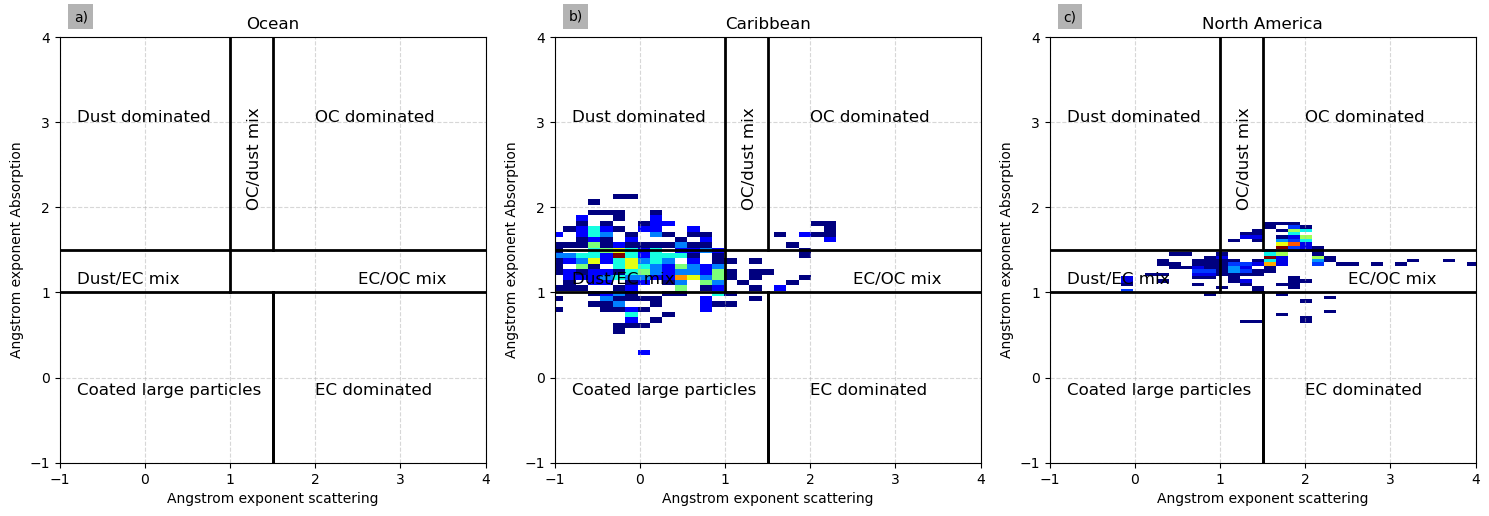

In [38]:
from matplotlib.transforms import ScaledTranslation

# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    }
}

# Create a 1x3 subplot grid
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=30)
    hist = np.where(hist == 0, np.nan, hist)

    # Plot the histogram inside the corresponding subplot
    ax[i].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1], ], cmap='jet'
    )

    # Set subplot labels and title
    ax[i].set_xlabel('Angstrom exponent scattering')
    ax[i].set_ylabel('Angstrom exponent Absorption')
    ax[i].set_title(title)
    ax[i].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)'
labels = ['a)', 'b)', 'c)']

# Add labels 'a)', 'b)', 'c)' and other elements
for i in range(3):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i].text(
        0.0, 1.08, labels[i],
        transform=ax[i].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(3):
    ax[i].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
    ax[i].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
    ax[i].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
    ax[i].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
    ax[i].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
    ax[i].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
    ax[i].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
    ax[i].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 
    ax[i].text(2, -0.2, 'EC dominated', fontsize=12, color='k')
    ax[i].text(2, 3, 'OC dominated', fontsize=12, color='k')
    ax[i].text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
    ax[i].text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
    ax[i].text(-0.8, -0.2, 'Coated large particles', fontsize=12, color='k')
    ax[i].text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
    ax[i].text(-0.8, 1.1, 'Dust/EC mix', fontsize=12, color='k')

# Set common axis limits for all subplots
for i in range(3):
    ax[i].set_ylim(-1, 4)
    ax[i].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
'''from matplotlib.transforms import ScaledTranslation

# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Africa_total': {
        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],
        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North Africa'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    }
}

# Create a 2x2 subplot grid
fig, ax = plt.subplots(1, 3, figsize=(15, 13), sharey='row', sharex='all')

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=30)
    hist = np.where(hist == 0, np.nan, hist)
    #hist = hist[~np.isnan(hist)]
    # Plot the histogram inside the corresponding subplot
    ax[i // 2, i % 2].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet'
    )

    # Set subplot labels and title
    ax[i // 2, i % 2].set_xlabel('Angstrom exponent scattering')
    ax[i // 2, i % 2].set_ylabel('Angstrom exponent Absorption')
    ax[i // 2, i % 2].set_title(title)
    ax[i // 2, i % 2].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)', 'd)'
labels = ['a)', 'b)', 'c)', 'd)']

# Add labels 'a)', 'b)', 'c)', 'd)' and other elements
for i in range(4):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i // 2, i % 2].text(
        0.0, 1.08, labels[i],
        transform=ax[i // 2, i % 2].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(2):
    for j in range(2):
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
        ax[i, j].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
        ax[i, j].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
        ax[i, j].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
        ax[i, j].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
        ax[i, j].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
        ax[i, j].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 

        ax[i, j].text(2, -0.2, 'EC dominated', fontsize=12, color='k')
        ax[i, j].text(2, 3, 'OC dominated', fontsize=12, color='k')
        ax[i, j].text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
        ax[i, j].text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
        ax[i, j].text(-0.8, -0.2, 'Coated large particles', fontsize=12, color='k')
        ax[i, j].text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
        ax[i, j].text(-0.8, 1.1, 'Dust/EC mix', fontsize=12, color='k')
# Set common axis limits for all subplots
for i in range(2):
    ax[i, 0].set_ylim(-1, 4)
    ax[i, 0].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()'''


"from matplotlib.transforms import ScaledTranslation\n\n# Data for the four subplots (replace with your actual data)\ndata = {\n    'Ocean_total': {\n        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],\n        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],\n        'title': 'Ocean'\n    },\n    'Africa_total': {\n        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],\n        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],\n        'title': 'North Africa'\n    },\n    'North America_total': {\n        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],\n        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],\n        'title': 'North America'\n    },\n    'Caribbean_total': {\n        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],\n        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],\n        'title': 'Caribbean'\n    }\n}\n\n# Create a 2x2 subplot grid\nfig, ax = plt.subplots(1, 3, figsize=(15, 13), sharey='row', sharex='all')\n\n# Loop through the data and cre

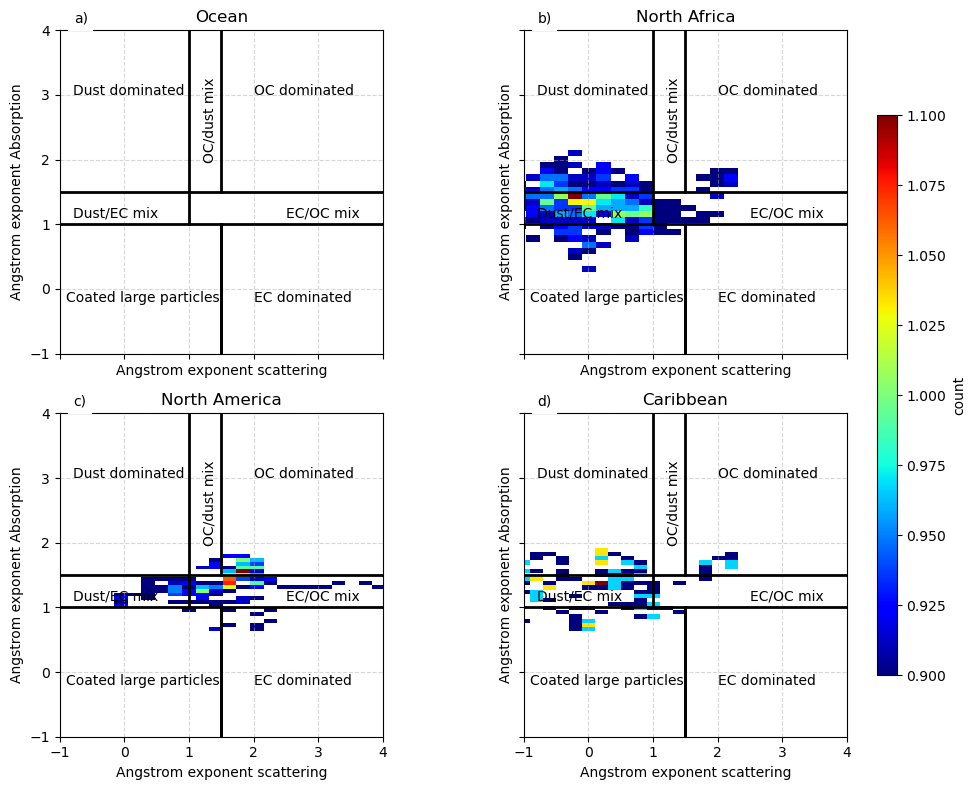

In [ ]:
# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Africa_total': {
        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],
        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North Africa'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    }
}

# Create a 2x2 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharey='row', sharex='all')

# Initialize a list to store the histogram images
hist_images = []

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=20)
    hist = np.where(hist == 0, np.nan, hist)
    #hist = hist[~np.isnan(hist)]

    # Plot the histogram inside the corresponding subplot
    im = ax[i // 2, i % 2].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet'
    )
    
    # Store the histogram image in the list
    hist_images.append(im)

    # Set subplot labels and title
    ax[i // 2, i % 2].set_xlabel('Angstrom exponent scattering')
    ax[i // 2, i % 2].set_ylabel('Angstrom exponent Absorption')
    ax[i // 2, i % 2].set_title(title)
    ax[i // 2, i % 2].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)', 'd)'
labels = ['a)', 'b)', 'c)', 'd)']

# Add labels 'a)', 'b)', 'c)', 'd)' and other elements
for i in range(4):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i // 2, i % 2].text(
        0.0, 1.08, labels[i],
        transform=ax[i // 2, i % 2].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='1', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(2):
    for j in range(2):
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
        ax[i, j].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
        ax[i, j].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
        ax[i, j].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
        ax[i, j].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
        ax[i, j].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
        ax[i, j].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 

        ax[i, j].text(2, -0.2, 'EC dominated', fontsize=10, color='k')
        ax[i, j].text(2, 3, 'OC dominated', fontsize=10, color='k')
        ax[i, j].text(1.2, 2, 'OC/dust mix', fontsize=10, color='k', rotation='vertical')
        ax[i, j].text(-0.8, 3, 'Dust dominated', fontsize=10, color='k')
        ax[i, j].text(-0.9, -0.2, 'Coated large particles', fontsize=10, color='k')
        ax[i, j].text(2.5, 1.1, 'EC/OC mix', fontsize=10, color='k')
        ax[i, j].text(-0.8, 1.1, 'Dust/EC mix', fontsize=10, color='k')

# Create a single color bar for all subplots
cax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
cbar = plt.colorbar(hist_images[0], cax=cax)
cbar.set_label('count')

for i in range(2):
    ax[i, 0].set_ylim(-1, 4)
    ax[i, 0].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


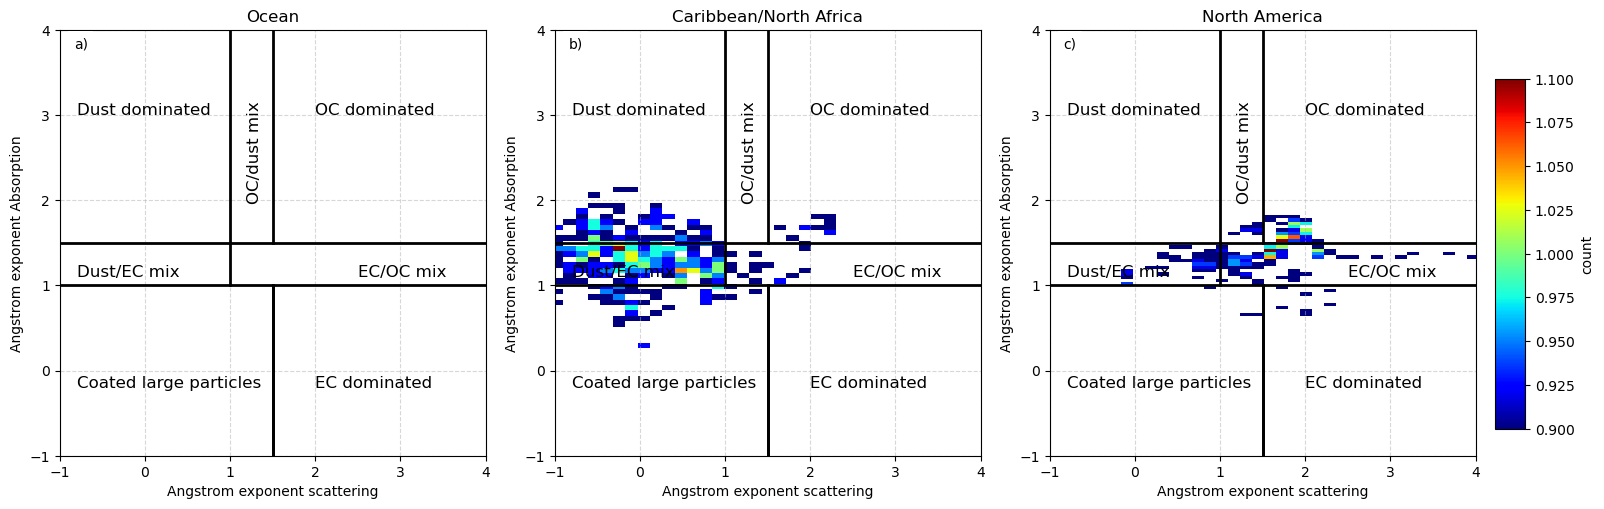

In [47]:
from matplotlib.transforms import ScaledTranslation

# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean/North Africa'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    }
}

# Create a 1x3 subplot grid
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Initialize a list to store the histogram images
hist_images = []

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=30)
    hist = np.where(hist == 0, np.nan, hist)

    # Plot the histogram inside the corresponding subplot
    im = ax[i].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1], ], cmap='jet'
    )
    # Store the histogram image in the list
    hist_images.append(im)

    # Set subplot labels and title
    ax[i].set_xlabel('Angstrom exponent scattering')
    ax[i].set_ylabel('Angstrom exponent Absorption')
    ax[i].set_title(title)
    ax[i].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)'
labels = ['a)', 'b)', 'c)']

# Add labels 'a)', 'b)', 'c)' and other elements
for i in range(3):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i].text(
        0.0, 1.0, labels[i],
        transform=ax[i].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='1', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(3):
    ax[i].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
    ax[i].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
    ax[i].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
    ax[i].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
    ax[i].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
    ax[i].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
    ax[i].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
    ax[i].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 
    ax[i].text(2, -0.2, 'EC dominated', fontsize=12, color='k')
    ax[i].text(2, 3, 'OC dominated', fontsize=12, color='k')
    ax[i].text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
    ax[i].text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
    ax[i].text(-0.8, -0.2, 'Coated large particles', fontsize=12, color='k')
    ax[i].text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
    ax[i].text(-0.8, 1.1, 'Dust/EC mix', fontsize=12, color='k')

# Create a single color bar for all subplots
cax = fig.add_axes([1.0, 0.15, 0.02, 0.7])
cbar = plt.colorbar(hist_images[0], cax=cax)
cbar.set_label('count')

# Set common axis limits for all subplots
for i in range(3):
    ax[i].set_ylim(-1, 4)
    ax[i].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Apply the conditions to filter the data
coated_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] <= 1.499) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 0.999)
]

coated_North_America_total
EC_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] >= 1.5) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 0.999)
]

EC_North_America_total

Dust_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] <= 0.999) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1.5)
]

Dust_North_America_total

Dust_EC_North_America_total = North_America_total[
    ((North_America_total['AEscat_450to700nm_ZIEMBA'] <=0.999) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1)  & (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 1.5))
]

Dust_EC_North_America_total

EC_OC_North_America_total = North_America_total[
    ((North_America_total['AEscat_450to700nm_ZIEMBA'] >=1.5) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1)  & (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 1.499))
]

EC_OC_North_America_total

OC_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] >=1.5) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1.5)
]

OC_North_America_total

OC_dust_North_America_total = North_America_total[
    ((North_America_total['AEscat_450to700nm_ZIEMBA'] >=1)  & (North_America_total['AEscat_450to700nm_ZIEMBA'] <= 1.499)) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1.5)
]

OC_dust_North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
85,2022-06-17 16:41:55,2022-06-17 16:41:56,32.226591,-64.955108,5388.54,1.480,1.625
86,2022-06-17 16:41:56,2022-06-17 16:41:57,32.227509,-64.956116,5397.44,1.470,1.610
87,2022-06-17 16:41:57,2022-06-17 16:41:58,32.228400,-64.957157,5406.42,1.440,1.650
88,2022-06-17 16:41:58,2022-06-17 16:41:59,32.229262,-64.958233,5415.43,1.360,1.670
89,2022-06-17 16:41:59,2022-06-17 16:42:00,32.230093,-64.959339,5424.48,1.265,1.640
90,2022-06-17 16:42:00,2022-06-17 16:42:01,32.230894,-64.960477,5433.58,1.230,1.615
91,2022-06-17 16:42:01,2022-06-17 16:42:02,32.231665,-64.961644,5442.75,1.305,1.635
92,2022-06-17 16:42:02,2022-06-17 16:42:03,32.232402,-64.962840,5451.97,1.400,1.680
93,2022-06-17 16:42:03,2022-06-17 16:42:04,32.233107,-64.964063,5461.20,1.475,1.715
